# A Multi-Period Product Recommender System in Online Food Market based on Recurrent Neural Networks 논문 공부 및 정리 (2)

# 출처 :  Hea In Lee 1, Il Young Choi 2, Hyun Sil Moon 2 and Jae Kyeong Kim 3,*

# 출처 사이트 - [https://www.mdpi.com/2071-1050/12/3/969](https://www.mdpi.com/2071-1050/12/3/969)

1     Department of Social Network Science, Kyunghee University, Seoul 02447, Korea; hil106@khu.ac.kr

2     Graduate School of Business Administration & AI Research Management Center, Kyunghee University, Seoul 02447, Korea; 

choice102@khu.ac.kr (I.Y.C.); pahunter@khu.ac.kr (H.S.M.)

3     School of Management, Kyunghee University, Seoul 02447, Korea; jaek@khu.ac.kr *  Correspondence: jaek @khu.ac.kr; Tel +82–2-
961–9355(J.K.K.)

Received: 13 December 2019; Accepted: 23 January 2020; Published: 29 January 2020




# 3. Methodology

3.1. Overview

The purpose of this study is to introduce a recommendation model considering purchase order to capture customers’ changing preferences and to examine the recommendation results of the proposed model from a multi-period perspective. 

Generally, customers received recommendation items at time T based on the purchase history up to the time point T-1.

Likewise, in this study, it is assumed that the transaction information before the specific time point T-1 is analyzed and the target customer is recommended to purchase items at the next time point T. 

Therefore, the time point T does not mean a specific timespan, but basket sequences. 

For example, a customer purchases 10 times through  the  online  food  market,  total  T  equals  10. 

The  purchase  at  T-1  means  the  previous purchase(basket), i.e., 9th purchase(basket). 

# 3. 방법론

3.1. 개요

본 연구의 목적은 구매 주문을 고려한 추천 모델을 도입하여 고객의 변화하는 선호도를 파악하고 제안된 모델의 추천 결과를 다중기간분석 모델 관점에서 살펴보는 것이다. 

일반적으로 고객은 T-1 시점까지의 구매 내역을 기반으로 T 시점에 추천 상품을 받았다. 

마찬가지로, 본 연구에서는 특정 시점 T-1 이전의 거래 정보를 분석하여 대상 고객이 다음 시점 T에서 아이템을 구매하도록 권장한다고 가정한다. 

따라서 시점 T가 특정 시간범위를 의미하는 것은 아니고 장바구니 순서입니다. 

예를 들어, 고객이 온라인 식품 시장을 통해 10번 구매하면 총 T는 10입니다. 

T-1에서의 구매는 이전 구매(장바구니) 즉, 9번째 구매(장바구니)를 의미합니다.


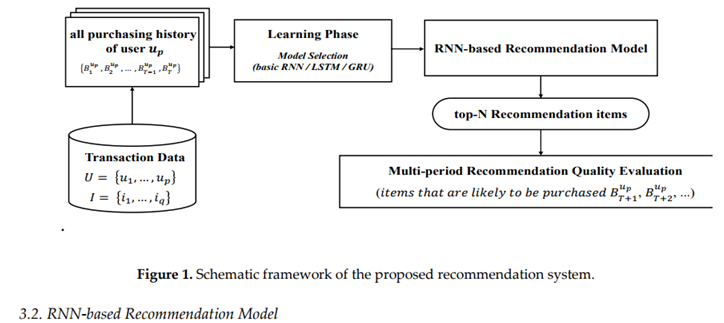

In [1]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/논문/추천시스템 논문/data/20211230_174456_1.png")

The recommendation model presents items likely to be purchased by customers at next time T+1 based on the previous purchasing history. 

In this study, we propose a recommendation model considering  both  purchase  information  and  purchasing order  using  RNN  which  could  take sequential pattern into account. 

The proposed RNN-based recommendation model is shown in Figure 2. 

In the case of repetitive purchasing pattern over time, the RNN-based recommendation model could learn the temporal changes according to the purchasing order because RNN has a mechanism for storing the previous information in hidden units. 

To design a RNN model for learning purchase information and purchasing order, data must be input to learn time-dependent features. 

Since the input of the neural networks should be converted into a vector, each item iq is encoded as 
a one-hot encoding and the purchase information Bt(Up)
of the customer Up is converted into multi-
hot encoding by adding one-hot encoding of items at the same purchasing order at time T.


추천 모델은 이전 구매 내역을 기반으로 다음 T+1 시점에 고객이 구매할 가능성이 있는 항목을 제시합니다.

본 연구에서는 순차적 패턴을 고려할 수 있는 RNN을 사용하여 구매 정보와 구매 주문을 모두 고려한 추천 모델을 제안한다.

제안한 RNN 기반 추천 모델은 그림 2와 같다. 

시간 경과에 따른 반복적인 구매 패턴의 경우 RNN은 숨겨진 유닛에서 이전 정보를 저장하는 메커니즘을 가지고 있기 때문에 RNN 기반 추천 모델은 구매 주문에 따른 시간적 변화를 학습할 수 있다. 

구매 정보 및 구매 주문 학습을 위한 RNN 모델을 설계하려면 시간 종속 기능을 학습하기 위한 데이터를 입력해야 합니다. 

신경망의 입력은 벡터로 변환되어야 하므로 각 물품 iq는 원핫 인코딩으로 인코딩되고 고객의 Up의 구매 정보 Bt(Up)는 T 시간에 동일한 구매 주문에서 물품의 원-핫 인코딩을 추가하여 다중 핫 인코딩으로 전환됩니다.



Xt is represented as a vector converted into a multi-hot encoding of all items in Bt(up) and the total length 
of the vector is same as the number of all items. 

iq is 1 if a customer purchased the item, otherwise it is 0. 

The output Ot is passed through the softmax function and represented as the probability of purchase.

The model can be seen as learning the previous purchase information and representing the purchase pattern  that  will appear at the next time in probability. 

In the learning process,  the difference between the predicted output (Ot) and the actual target (yT) is calculated by the loss function, here by category cross-entropy, and the weights are updated through back-propagation of the error. Finally, the top-N items with the greatest probability are recommended.

XT는 BT(up)의 모든 물품을 멀티-핫 인코딩으로 변환한 벡터로 표현됩니다.

그리고 벡터의 전체적인 길이는 모든 물품의 수와 같습니다.

iq는 고객이 품목을 구매한 경우 1이고 그렇지 않은 경우 0입니다. 

출력 OT는 softmax 함수를 통해 전달되고 구매 확률로 표시됩니다.

모델은 이전 구매 정보를 학습하고 다음 번에 나타날 구매 패턴을 확률적으로 표현한 것으로 볼 수 있습니다. 

학습 과정에서 예측된 출력(OT)과 실제 목표(yT) 간의 차이는 손실 함수(여기서는 범주 교차 엔트로피)에 의해 계산되고 가중치는 오류의 역전파를 통해 업데이트됩니다. 마지막으로 확률이 가장 높은 상위 N개 물품을 추천합니다.

# One-Hot Encoding 이란?

## 참고사이트 - [https://needjarvis.tistory.com/565](https://needjarvis.tistory.com/565)

n개의 범주형 데이터를 n개의 비트(0, 1) 벡터로 표현

서로 다른 범주 데이터는 독립적인 관계라는 것을 나타낼 수 있음

또한 keras으로 구현가능


# 다시 논문으로 돌아가서 설명하자면

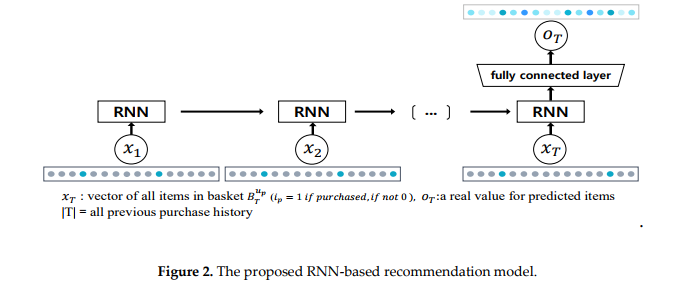

In [2]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/논문/추천시스템 논문/data/20211230_180549_1.png")

3.3. Multi-period Recommender Systems

In this study, the proposed RNN-based recommendation model is evaluated by multiple periods observing  the  performance  of  various  recommendation  time-steps.  

Traditional  recommender systems study only focus on the model accuracy of the next point in time when recommending items to the customer and evaluating model performance, which means they evaluate the accuracy of the model only once. 

Indeed, customers’ preferences may change over time which may degrade the performance  of  the  recommendation  model. 

So,  in  this  study,  recommendation  periods  are segmented as various time-steps, and the proposed RNN-based recommendation model is evaluated by multiple periods in a time sequence. 

To be more precise, multi-period recommender systems evaluate the performance not only at time point T but also the subsequent time points such as T + 1, T + 2, and so on. 

Figure 3 as below shows the example of a multi-period recommender system.

3.3. 다중기간분석모델 추천 시스템 

이 연구에서 제안된 RNN 기반 추천 모델은 다양한 추천 시간 단계의 성능을 관찰하는 여러 기간에 의해 평가됩니다. 

기존의 추천 시스템 연구는 고객에게 물품을 추천하고 모델 성능을 평가할 때 다음 시점의 모델 정확도에만 초점을 맞추므로 모델의 정확도를 한 번만 평가합니다. 

실제로 고객의 선호도는 시간이 지남에 따라 변경되어 추천 모델의 성능을 저하시킬 수 있습니다. 

따라서 본 연구에서는 추천 기간을 다양한 시간 단계로 구분하고 제안하는 RNN 기반 추천 모델을 시간 순서대로 여러 기간으로 평가한다.

좀 더 정확하게 말하자면, 다중기간분석모델 추천 시스템은 T 시점뿐만 아니라 이후 T+1, T+2 등의 시점에서도 성능을 평가한다.

아래 그림 3은 다중기간분석모델 추천 시스템의 예를 보여줍니다.

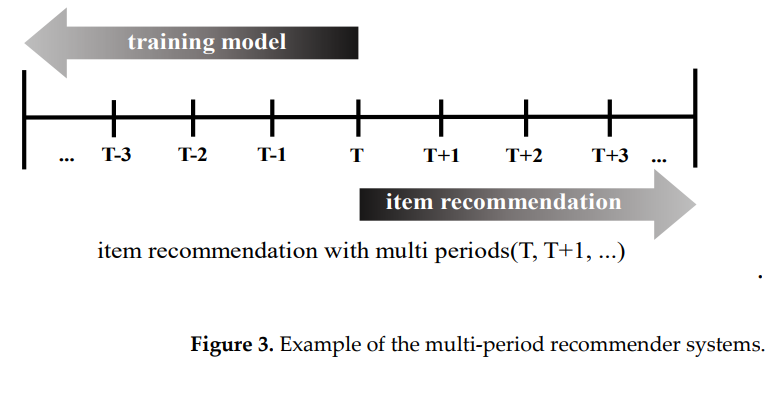

In [1]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/논문/추천시스템 논문/data/20211231_030403_1.png")

3.4. Evaluation Metrics

Most of the recommender systems measure the accuracy of the recommended items because if the accuracy is not high, it means that the recommended items were not consumed by the users. 

To measure  the  accuracy,  recall,  precision  and  F1  metrics  are  widely  used in  previous  studies [4,11,12,18,31]. 

In this paper, F1 measure is used to measure the accuracy of recommender systems because it considers both precision and recall to compute the score. 

On the other hand, if the recommendation systems recommend similar items each time, there is a risk of reducing the diversity of the entire consumer, and if the similar items are recommended every time, the satisfaction of the recommendation systems will decrease. 

Lathia et al. [32] mentioned that diversity should be pursued while maintaining a certain level of accuracy to increase satisfaction with the recommendation systems, and the following diversity metric is suggested.

3.4. 평가 지표

대부분의 추천 시스템은 추천 물품들의 정확도를 측정하는데 정확도가 높지 않다면 사용자가 추천 물품들을 소비하지 않았다는 뜻이다. 

정확도를 측정하기 위해 이전 연구에서 재현율, 정밀도 및 F1 측정항목이 널리 사용되었습니다[4,11,12,18,31].

본 논문에서는 추천 시스템의 정확도를 측정하기 위해 F1 측정을 사용하는데, 이는 점수를 계산할 때 정밀도와 재현율을 모두 고려하기 때문이다. 

반면 추천 시스템이 매번 유사한 물품들을 추천한다면 전체 소비자의 다양성을 감소시킬 위험이 있고, 매번 유사한 물품들을 추천한다면 추천 시스템의 만족도가 떨어질 것이다.

Lathia et al. [32]는 추천 시스템에 대한 만족도를 높이려면 일정 수준의 정확도를 유지하면서 다양성을 추구해야 한다고 언급하고 다음과 같은 다양성 메트릭을 제안한다.


# 재현율 ,정밀도 , F1 측정항목이란?

# 참고사이트 - [https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=sogangori&logNo=220986343741](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=sogangori&logNo=220986343741)

정확도 : 예측이 정답과 얼마나 정확한가?

정밀도 : 예측한 것중에 정답의 비율은?

재현율 : 찾아야 할 것중에 실제로 찾은 비율은?

F1 Score : 정밀도와 재현율의 평균

- 예시

번호 : [  1,    2,    3,    4,    5,    6  ]

정답 : [음치,음치,음치,음치,정상,정상] 

예측 : [음치,음치,정상,정상,정상,정상]



정확도 : 예측이 맞은 비율은?

         1,2,5,6 번 맞추고 3,4번은 틀렸다. 6명중 4명 맞췄으므로 4/6 = 2/3 = 0.66 

정밀도 : 음치라고 예측한 사람들 중에 진짜 음치가 얼마나 있는가?

          내가 음치라고 예측한 1,2번 이 둘다 음치가 맞았다. 2/2 = 1.00

재현율 : 전체 음치 중에서 내가 맞춘 음치의 비율은?

          원래 음치가 4명 있는데 나는 그중에서 2명을 맞췄다. 2/4 = 0.5

F1 Score : 정밀도와 재현율의 평균 

            2 * 정밀도 * 재현율 /(정밀도+재현율) = 2 * 1.00 * 0.5 / (1.00 + 0.5) = 0.66



만약 음치 아니라 실력자를 찾는 것이 목적이었다면



정확도 : 예측이 맞은 비율은?

         1,2,5,6 번 맞추고 3,4번은 틀렸다. 6명중 4명 맞췄으므로 4/6 = 2/3 = 0.66 

정밀도 : 실력자라고 예측한 사람들 중에 진짜 실력자가 얼마나 있는가?

          내가 실력자라고 예측한 3,4,5,6번 중 실력자는 5,6번 뿐이다. 2/4 = 0.5

재현율 : 전체 실력자 중에서 내가 맞춘 실력자의 비율은?

          원래 실력자가 2명 있는데 나는 그중에서 2명을 맞췄다.  2/2 = 1.00

F1 Score : 정밀도와 재현율의 평균 

            2 * 정밀도 * 재현율 /(정밀도+재현율) = 2 * 0.5 * 1.0 / (0.5 + 1.0) = 0.66



대부분의  분류문제는 희소한 샘플을 찾는 것이 목적이다.

위의 예에서 음치는 4명이고 정상이 2명이다. 음치가 많고 정상이 희소하므로  아마도 정상을 찾는 것이 목표일 것이다.



파이썬으로 구현해보자

In [10]:
import numpy as np

import sklearn.metrics as metrics



y = np.array([1,1,1,1,0,0]) #0은 정상(실력자), 1은 음치

p = np.array([1,1,0,0,0,0]) #나의 예측



accuracy = np.mean(np.equal(y,p))

right = np.sum(y * p == 1)

precision = right / np.sum(p)

recall = right / np.sum(y)

f1 = 2 * precision*recall/(precision+recall)



print('accuracy',accuracy)

print('precision', precision)

print('recall', recall)

print('f1', f1)


print("_______________________________")
# sklearn 을 이용하면 전부 계산해준다.

print("음치를 찾는게 목적일때")

print('accuracy', metrics.accuracy_score(y,p) )

print('precision', metrics.precision_score(y,p) )

print('recall', metrics.recall_score(y,p) )

print('f1', metrics.f1_score(y,p) )

print("_______________________________")

print("실력자를 찾는게 목적일때")
print('accuracy', metrics.accuracy_score(p,y) )

print('precision', metrics.precision_score(p,y) )

print('recall', metrics.recall_score(p,y) )

print('f1', metrics.f1_score(p,y) )

accuracy 0.6666666666666666
precision 1.0
recall 0.5
f1 0.6666666666666666
_______________________________
음치를 찾는게 목적일때
accuracy 0.6666666666666666
precision 1.0
recall 0.5
f1 0.6666666666666666
_______________________________
실력자를 찾는게 목적일때
accuracy 0.6666666666666666
precision 0.5
recall 1.0
f1 0.6666666666666666


In [7]:

print(metrics.classification_report(y,p))

print(metrics.confusion_matrix(y,p))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6

[[2 0]
 [2 2]]


# 다시 논문으로 돌아가서 설명하자면

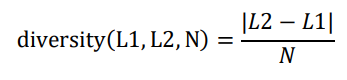

In [2]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/논문/추천시스템 논문/data/20211231_031639_1.png")

L1 and L2 are the recommended list and N is the number of recommended items. In this study, this temporal diversity metric is also used to measure the diversity of the recommended list.

L1과 L2는 추천 목록이고 N은 추천 물품들의 수입니다. 본 연구에서는 시간적 다양성 메트릭을 사용하여 추천 목록의 다양성을 측정하기도 합니다.

# 4. Evaluation

4.1. Data Description

The data used in this study is transaction data from Fresh Food Delivery Service Company in USA, published in 2017 at the data analysis competition platform Kaggle.

As mentioned above, its products’ prices are generally low and customers habitually purchase. 

Therefore, it is a good data set for our experiment because our methodology considers repurchase behavior that other recommender systems are not interested in. 

Moreover, the transactional data was collected for one year, so we could ignore seasonal factors that could affect model building and performance. 

The data provides real purchase information for each customer and the order number which is indicated by an index assigned  to  each  customer  according  to  the  order  of  purchase  of  items. 

For  experiments,  the purchased items by customers are arranged according to the order of purchase time, and finally, all the buying information corresponding to the same order number is composed of the same shopping list.

# 4. 평가

4.1. 데이터 설명

본 연구에 사용된 데이터는 2017년 데이터 분석 대회 플랫폼 Kaggle에 게재된 미국 Fresh Food Delivery Service Company의 거래 데이터를 사용하였다.

위에서 언급했듯이 제품의 가격이 일반적으로 저렴하고 고객이 습관적으로 구매합니다. 

따라서 우리의 방법론은 다른 추천 시스템이 관심을 갖지 않는 재구매 행동을 고려하기 때문에 실험에 좋은 데이터 세트입니다.

또한 거래 데이터는 1년 동안 수집되었으므로 모델 구축 및 성능에 영향을 미칠 수 있는 계절적 요인을 무시할 수 있었습니다. 

데이터는 각 고객에 대한 실제 구매 정보와 물품들의 구매 순서에 따라 각 고객에게 할당된 인덱스로 표시되는 주문 번호를 제공합니다. 

실험을 위해 고객이 구매한 물품들을 구매 시간 순서대로 배열하고 마지막으로 동일한 주문 번호에 해당하는 모든 구매 정보가 동일한 쇼핑 목록으로 구성됩니다.


In order to compare the recommended performance of the models over time, we used 7716 customers’ shopping information with 10 shopping carts. 

Generally, recommender systems based on these transaction data could not infer with the preference of extremely popular items because they are products almost everyone buys. 

On the other hand, because sales sub-products are usually purchased by customers with unusual tastes, they could be outliers to build a model. 

For these reasons, a total of 9073 items were used, except for items that appeared too often or appeared less frequently, so we excluded the top and lower 10% of the sales volume for the experiments.

As mentioned earlier, in this study, a recommendation model is measured by multiple recommendation periods. 

For this purpose, at the recommendation time point T, all the information before point T is regarded as training data and the subsequent buying information is considered as test data.

시간 경과에 따른 모델의 추천 성능을 비교하기 위해 7716명의 고객 쇼핑 정보와 10개의 장바구니를 사용했습니다. 

일반적으로 이러한 거래 데이터를 기반으로 하는 추천 시스템은 거의 모든 사람이 구매하는 제품이기 때문에 매우 인기 있는 물품들의 선호도를 추론할 수 없습니다. 

반면, 판매 하위 제품은 일반적으로 특이한 취향을 가진 고객이 구매하기 때문에 모델을 구축하는 데 이상치가 될 수 있습니다. 

이러한 이유로 너무 자주 등장하거나 덜 자주 등장하는 물품들을 제외하고 총 9073개의 물품들이 사용되었으므로 실험에서는 판매량의 상위 10%와 하위 10%를 제외했습니다.

앞서 언급한 바와 같이 본 연구에서는 추천 모델을 여러 추천 기간으로 측정한다. 

이를 위해 추천 시점 T에서 시점 T 이전의 모든 정보는 학습 데이터로 간주하고 후속 구매 정보는 테스트 데이터로 간주한다.

4.2. Experimental Setup

As with most studies on neural networks, we have also experimented various recurrent neural networks structure (basic RNN, LSTM, GRU) and parameters to be used as a recommendation model. 

First, we experiment with the number of hidden nodes in the basic RNN, LSTM, and GRU. 

As the number of hidden nodes increases, the initial learning rapidly progresses and quickly converges. 

However, since the number of parameters to learn increases as the number of hidden nodes increases, the optimal number of hidden nodes is set to 100.

Also, since LSTM is slightly better than basic RNN and GRU, LSTM is used as a final model of recommendation in this study. 

Since the increase in the number of layers does not contribute to the improvement of our suggested model performance, so the number of hidden layers is set to one in our LSTM structure. 

4.2. 실험 설정

신경망에 대한 대부분의 연구와 마찬가지로 우리는 다양한 순환 신경망 구조(기본 RNN, LSTM, GRU)와 추천 모델로 사용할 매개변수도 실험했습니다. 

먼저 기본 RNN, LSTM 및 GRU에서 숨겨진 노드의 수를 실험합니다.

은닉 노드의 수가 증가할수록 초기 학습이 빠르게 진행되고 빠르게 수렴됩니다. 

그러나 은닉 노드의 수가 증가할수록 학습할 파라미터의 수가 증가하므로 최적의 은닉 노드의 수는 100으로 설정한다. 

또한 LSTM이 기본 RNN 및 GRU보다 약간 우수하므로 LSTM을 최종 모델로 사용한다. 

레이어 수의 증가는 제안된 모델 성능 향상에 기여하지 않으므로 LSTM 구조에서 은닉층 수를 하나로 설정합니다.

# 은닉층 이란?

# 참고사이트 - [https://deepai.org/machine-learning-glossary-and-terms/hidden-layer-machine-learning](https://deepai.org/machine-learning-glossary-and-terms/hidden-layer-machine-learning)

In neural networks, a hidden layer is located between the input and output of the algorithm, in which the function applies weights to the inputs and directs them through an activation function as the output. 

In short, the hidden layers perform nonlinear transformations of the inputs entered into the network. 

Hidden layers vary depending on the function of the neural network, and similarly, the layers may vary depending on their associated weights.

How does a Hidden Layer work?

Hidden layers, simply put, are layers of mathematical functions each designed to produce an output specific to an intended result.

For example, some forms of hidden layers are known as squashing functions. 

These functions are particularly useful when the intended output of the algorithm is a probability because they take an input and produce an output value between 0 and 1, the range for defining probability.

신경망에서 은닉층은 알고리즘의 입력과 출력 사이에 위치하며, 여기서 은닉층의 기능은 입력에 가중치를 적용하고 출력으로 활성화 함수를 통해 지시합니다. 

간단히 말해서, 은닉층은 네트워크에 입력된 입력의 비선형 변환을 수행합니다. 

은닉층은 신경망의 기능에 따라 달라지며, 마찬가지로 연관된 가중치에 따라 달라질 수 있습니다. 

은닉층은 어떻게 작동합니까? 

은닉층은 간단히 말해서 의도한 결과에 특정한 출력을 생성하도록 설계된 수학 함수의 층입니다.

예를 들어, 은닉층의 일부 형태는 스쿼싱 함수으로 알려져 있습니다. 

이러한 함수는 입력을 받아 확률을 정의하는 범위인 0과 1 사이의 출력 값을 생성하기 때문에 알고리즘의 의도된 출력이 확률인 경우 특히 유용합니다.

Hidden layers allow for the function of a neural network to be broken down into specific transformations of the data.

Each hidden layer function is specialized to produce a defined output. 

For example, a hidden layer functions that are used to identify human eyes and ears may be used in conjunction by subsequent layers to identify faces in images. 

While the functions to identify eyes alone are not enough to independently recognize objects, they can function jointly within a neural network.


Hidden Layers and Machine Learning

Hidden layers are very common in neural networks, however their use and architecture often varies from case to case. 

As referenced above, hidden layers can be separated by their functional characteristics. For example, in a CNN used for object recognition, a hidden layer that is used to identify wheels cannot solely identify a car, however when placed in conjunction with additional layers used to identify windows, a large metallic body, and headlights, the neural network can then make predictions and identify possible cars within visual data.

은닉층을 사용하면 신경망의 기능을 데이터의 특정 변환으로 나눌 수 있습니다. 

각 은닉층 기능은 정의된 출력을 생성하도록 특화되어 있습니다.

예를 들어, 사람의 눈과 귀를 식별하는 데 사용되는 은닉층 기능은 이미지에서 얼굴을 식별하기 위해 후속 층과 함께 사용될 수 있습니다.

눈을 식별하는 기능만으로는 객체를 독립적으로 인식하기에 충분하지 않지만, 신경망 내에서는 공동으로 역할을 할 수 있습니다.

은닉층과 머신 러닝

은닉층은 신경망에서 매우 일반적이지만, 사용 및 구조는 경우에 따라 다릅니다. 

위에서 언급한 바와 같이 은닉층은 기능적 특징에 따라 분리될 수 있습니다. 


# 다시 논문으로 돌아가서 설명하자면



Also the optimization function should be determined by experiment, as it is known that there is no optimization function that ﬁts into all problems so it should be set on an experimental basis. 

Figure 4 shows the experimental results of various optimization algorithms. In this ﬁgure, when an entire dataset was passed through the neural network model, an epoch was complete. For example, 10 epochs mean that an entire dataset was passed through the model 10 times. Therefore, as the epoch increases, the loss value decreases. Category cross-entropy was used as a loss function. Among optimization algorithms, Adam optimizer which shows the best performance is selected, and the hyper-parameter is set by the value known as the best default value.

또한 최적화 함수는 모든 문제에 맞는 최적화 함수가 없기 때문에 실험을 해서 결정과 설정해야 합니다. 

그림 4는 다양한 최적화 알고리즘의 실험 결과를 보여줍니다. 

이 그림에서 전체 데이터 세트가 신경망 모델을 통과했을 때 에포크가 완료되었습니다. 예를 들어, 10 Epoch는 전체 데이터 세트가 모델을 10번 통과했음을 의미합니다. 따라서 Epoch가 증가할수록 손실 값은 감소합니다. 범주 교차 엔트로피는 손실 함수로 사용되었습니다. 최적화 알고리즘 중 가장 성능이 좋은 Adam 옵티마이저를 선택하고, 하이퍼파라미터는 최적의 기본값으로 알려진 값으로 설정합니다.
